In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def quicksort(arr, estrategia_pivo):
    if len(arr) <= 1:
        return arr
    else:
        if estrategia_pivo == 'primeiro':
            pivot = arr[0]
        elif estrategia_pivo == 'central':
            pivot = arr[len(arr)//2]
        elif estrategia_pivo == 'media':
            pivot = (arr[0] + arr[len(arr)//2] + arr[-1]) // 3
        elif estrategia_pivo == 'randomico':
            pivot = random.choice(arr)
        elif estrategia_pivo == 'mediana':
            pivot = sorted([arr[0], arr[len(arr)//2], arr[-1]])[1]
        elif estrategia_pivo == 'acha_pivo':
            pivot = acha_pivo(arr)

        menores = [x for x in arr if x < pivot]
        iguais = [x for x in arr if x == pivot]
        maiores = [x for x in arr if x > pivot]

        return quicksort(menores, estrategia_pivo) + iguais + quicksort(maiores, estrategia_pivo)

In [3]:
def acha_pivo(arr):
    # Índices dos elementos relevantes
    primeiro = 0
    central = len(arr) // 2
    ultimo = len(arr) - 1

    # Valores dos elementos relevantes
    valor_primeiro = arr[primeiro]
    valor_central = arr[central]
    valor_ultimo = arr[ultimo]

    # Encontrar a mediana
    mediana_indices = [primeiro, central, ultimo]
    mediana_indices.remove(max(mediana_indices))
    mediana_indices.remove(min(mediana_indices))
    indice_mediana = mediana_indices[0]

    # Trocar o pivô com o elemento na posição da mediana
    arr[primeiro], arr[indice_mediana] = arr[indice_mediana], arr[primeiro]
    return arr[primeiro]

In [4]:
def create_suffled_list(n,embaralhamento):
    arr = list(range(n))
    num_trocas = int(embaralhamento*n)
    for _ in range(num_trocas):
        i, j = random.sample(range(n), 2)
        arr[i], arr[j] = arr[j], arr[i]
    return arr

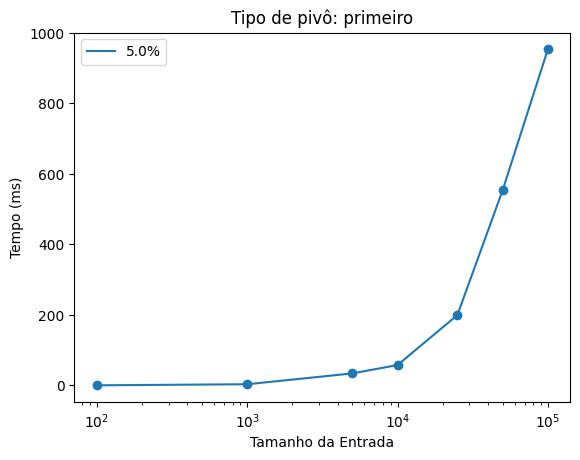

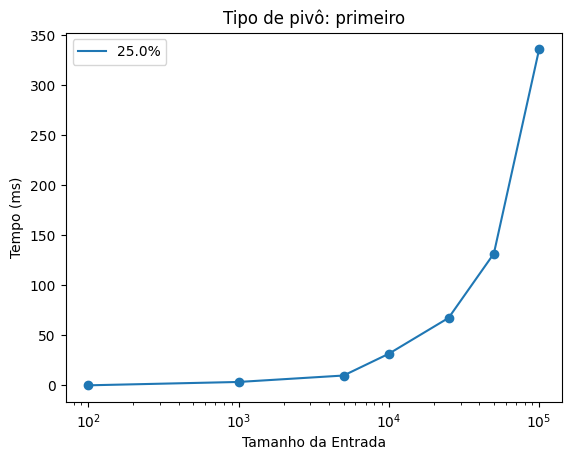

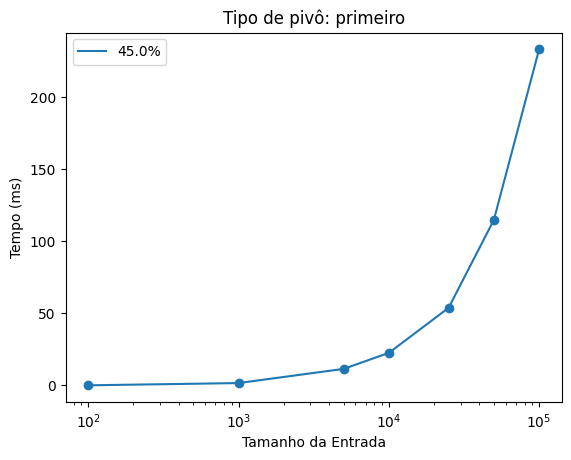

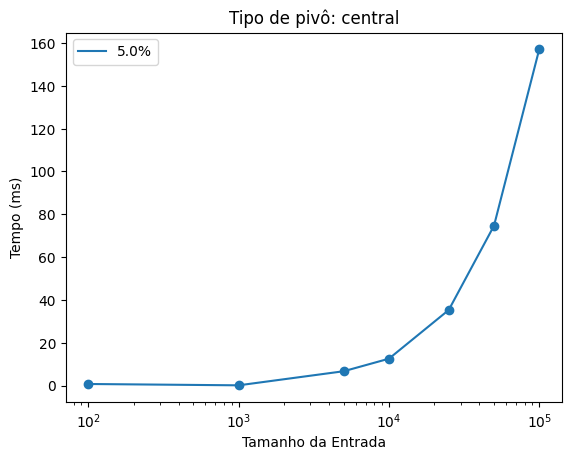

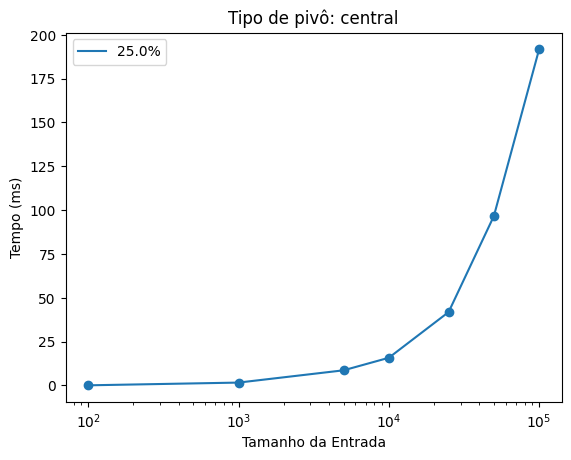

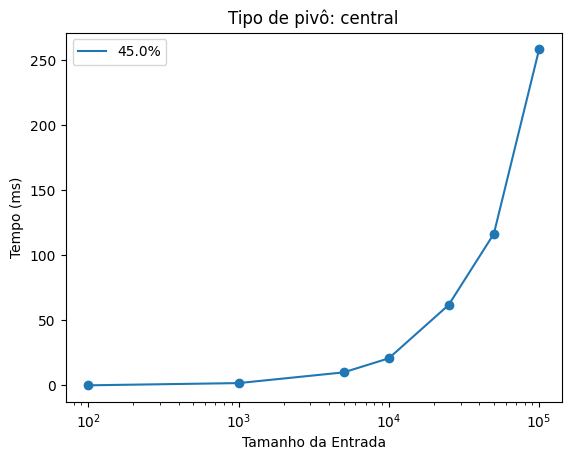

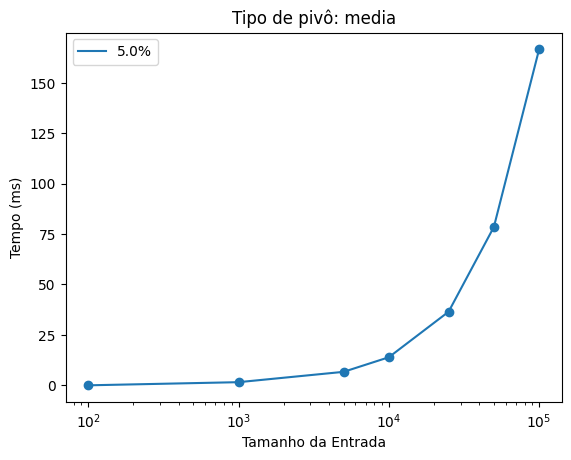

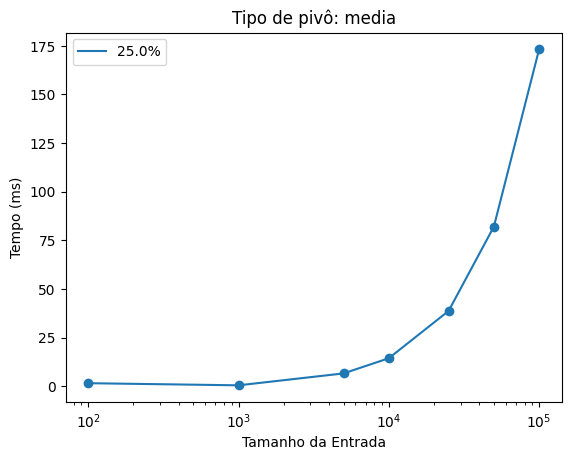

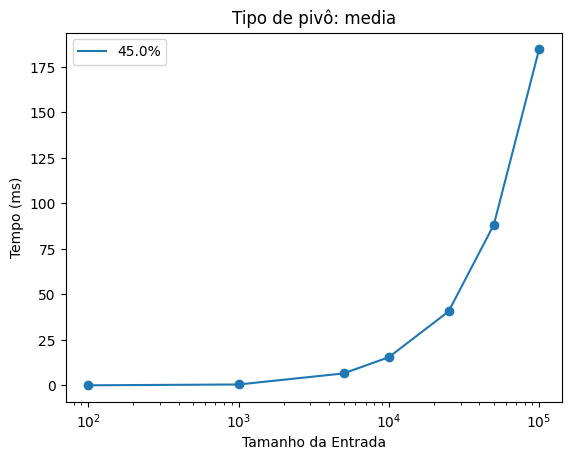

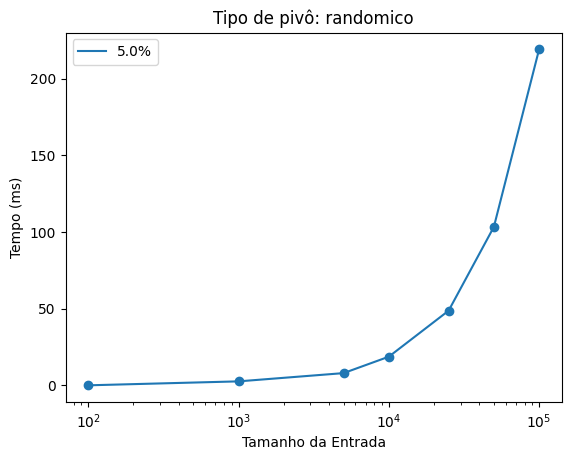

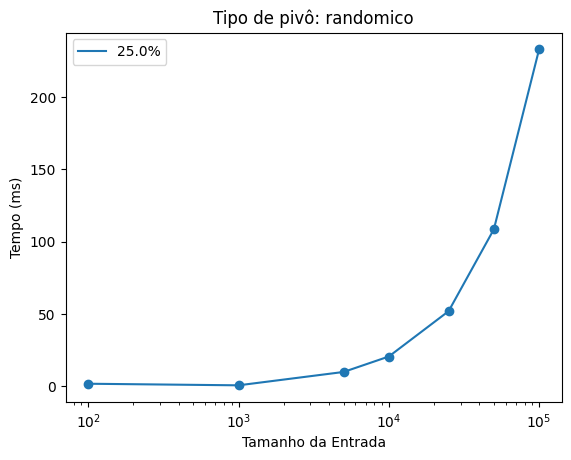

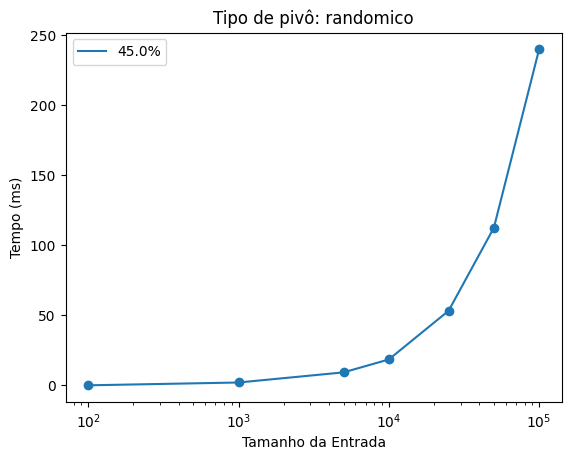

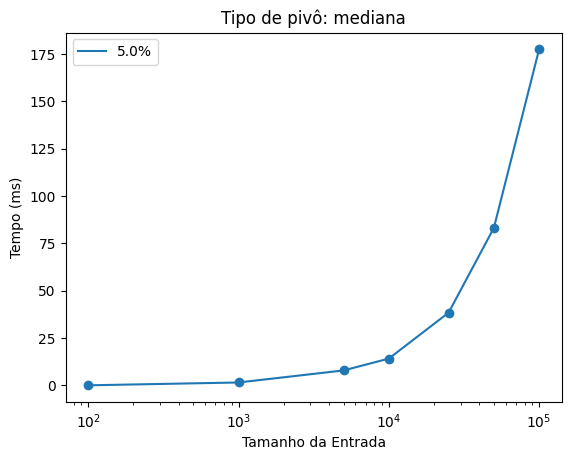

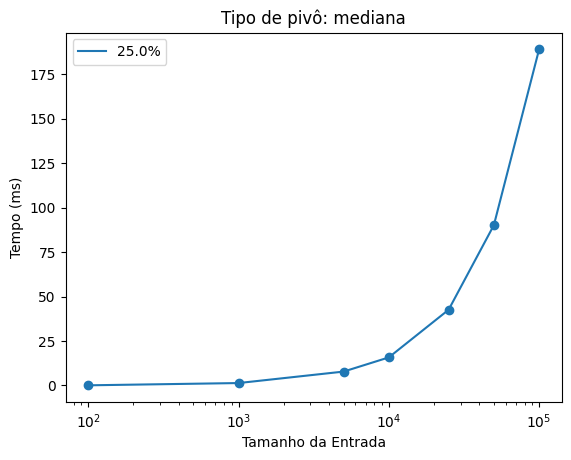

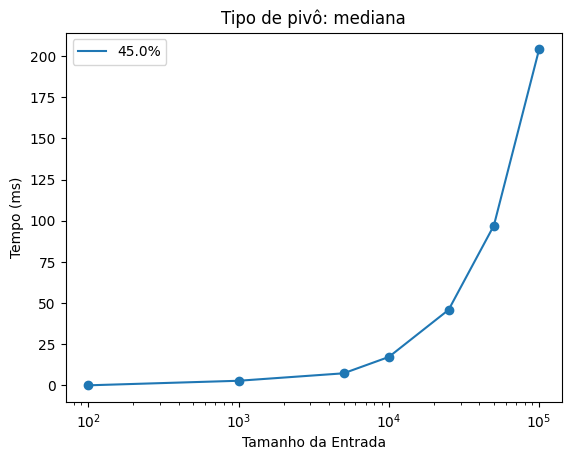

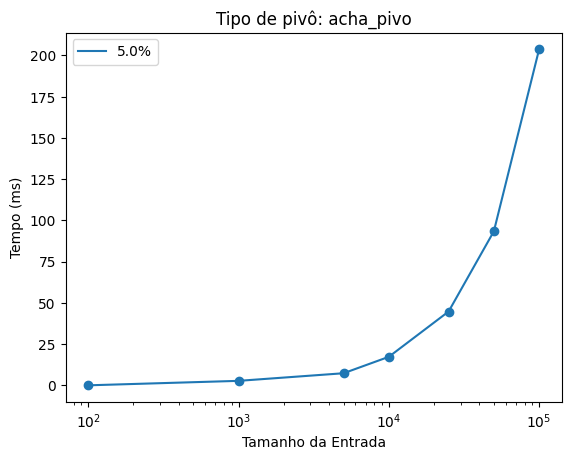

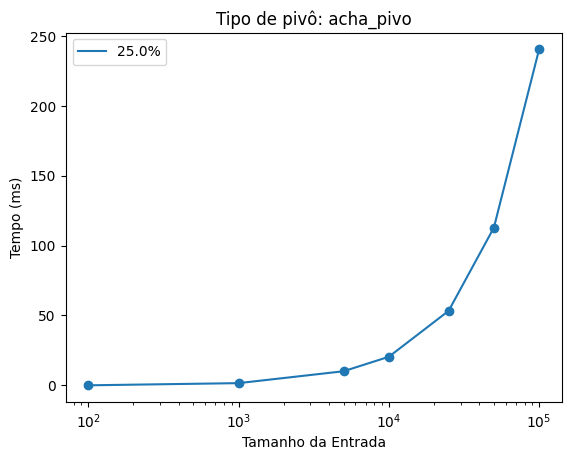

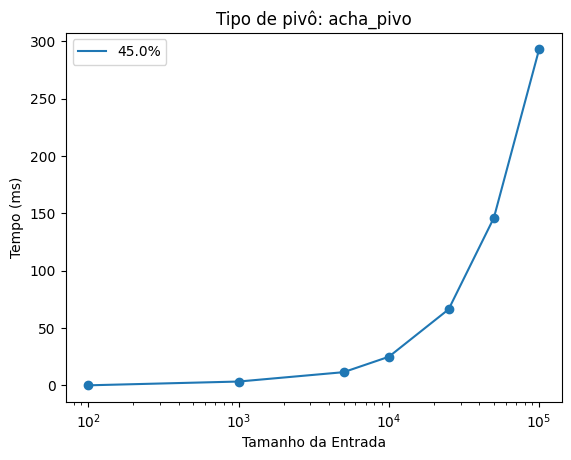

In [15]:
for estrategia in ['primeiro', 'central', 'media', 'randomico', 'mediana', 'acha_pivo']:
    for index, embaralhamento in enumerate([0.05, 0.25, 0.45]):
        x = []
        y = []
        for n in [100,1000,5000,10000,25000,50000,100000]:
            x.append(n)
            minha_lista = create_suffled_list(n,embaralhamento)
            soma = 0
            for _ in range(10):
                inicio = time.time()
                quicksort(minha_lista, estrategia)
                fim = time.time()
                soma = soma + (fim-inicio)*1000
            media = soma/10
            y.append(media)
    
        plt.semilogx(x, y, label=f'{embaralhamento*100}%')
        plt.scatter(x, y)
        plt.xlabel('Tamanho da Entrada')
        plt.ylabel('Tempo (ms)')
        plt.title(f'Tipo de pivô: {estrategia}')
        plt.legend()
        plt.savefig(f'grafico_{estrategia}_{embaralhamento}.png')
        plt.show()